In [1]:
from sklearn import tree
import pandas as pd
import os
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud 

In [2]:
df = pd.read_csv(os.path.join("..", "data", "final_bitcoin.csv"))
df.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000


In [3]:
df_neg = df[df['negative'] > 0.2]
df_pos = df[df['positive'] > 0.2]

In [4]:
df_pos

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
8,8,2022-05-01,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",0.000,0.672,0.328,0.5267
18,18,2022-05-01,"['willpapp', 'hahahaha', 'holyyyy', 'cow', 'lm...",0.180,0.619,0.201,0.1027
19,19,2022-05-01,"['letsgo', 'bitcoin', 'well']",0.000,0.488,0.512,0.2732
25,25,2022-05-01,"['yet', 'invent', 'guy', 'bitcoin', 'person', ...",0.000,0.733,0.267,0.5780
...,...,...,...,...,...,...,...
149980,9966,2022-05-14,"['tendermint', 'bitcoin', 'cool', 'lil', 'gizmo']",0.000,0.635,0.365,0.3182
149982,9968,2022-05-14,"['market', 'ralli', 'friday', 'dead', 'cat', '...",0.223,0.518,0.259,-0.0772
149989,9975,2022-05-14,"['bitcoin', 'like', 'allig', 'feed', 'full', '...",0.000,0.737,0.263,0.3612
149992,9978,2022-05-14,"['refer', 'friend', 'get', '100', 'usdt', 'htt...",0.000,0.758,0.242,0.4939


In [5]:
print(len(df_neg))
print(len(df_pos))

5283
16407

13489
25287


16407

In [6]:
positive = df_pos['cleaned']


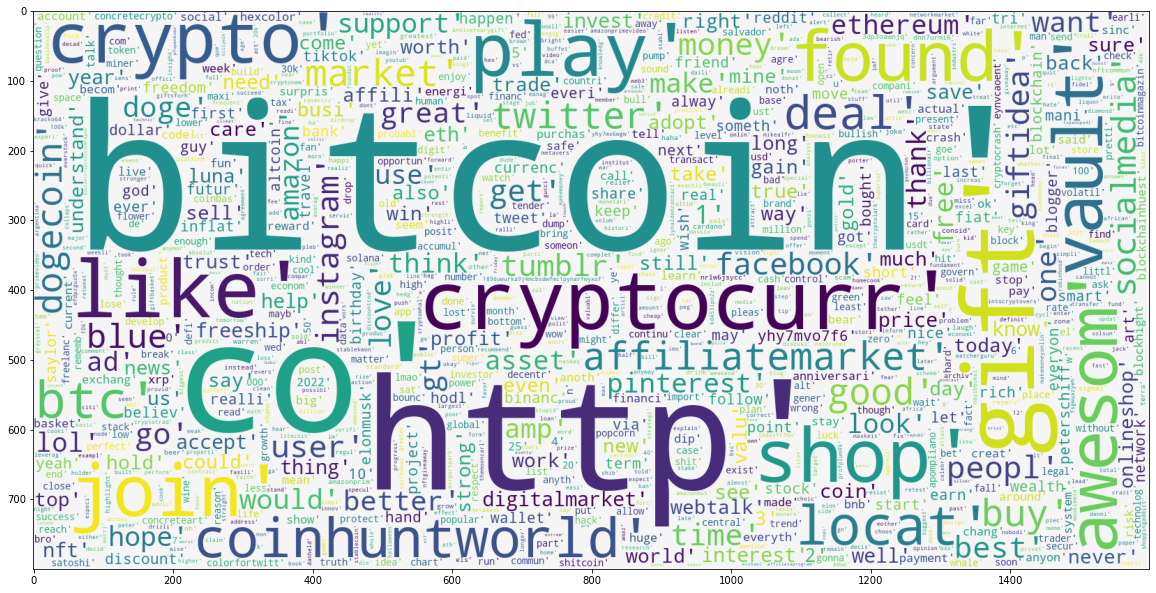

In [7]:
positive = df_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

plt.savefig("../images/btcwcpos.png")

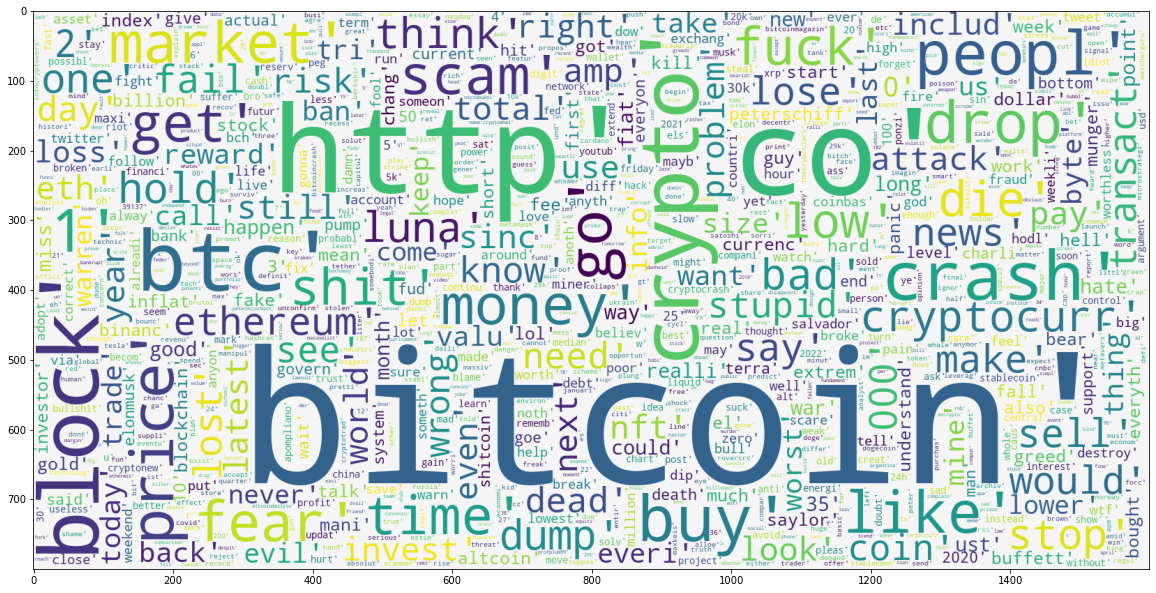

In [8]:
negative = df_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

plt.savefig("../images/btcwcneg.png")

In [9]:

##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(df)):
    if df.loc[i,'negative']>0:
        sentiment0+=[0]
    elif df.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [10]:
df['sentiment']=sentiment0
df['sentiment'].value_counts()
bitcoin = df.rename(columns={"Datetime": "date"})
bitcoin.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423,0
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360,2
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000,0


In [11]:
target = bitcoin["cleaned"]
target_names = bitcoin[["sentiment"]]


In [12]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [13]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  600000


In [14]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [15]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1862
           1       0.80      0.97      0.88      3689
           2       0.92      0.67      0.78      1950

    accuracy                           0.83      7501
   macro avg       0.85      0.79      0.81      7501
weighted avg       0.84      0.83      0.83      7501



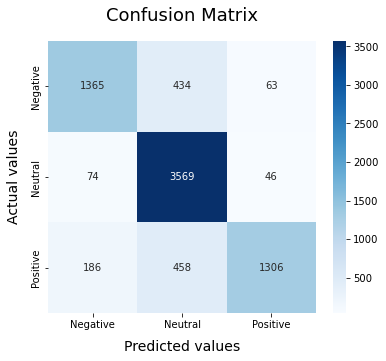

In [16]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

plt.savefig("../images/btcconfusion.png")

In [17]:
crypto = pd.read_csv(os.path.join("../Data", "price.csv"))

In [18]:
crypto['Change BTC'] = crypto.bitcoin_price - crypto.bitcoin_price.shift(1)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,37.885934
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-470.067885
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-656.857913
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,175.554222
...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,-114.164630
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,1266.997362
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,1535.030669
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-2159.018238


In [19]:
crypto['BTC Up/Down'] = np.where(crypto['Change BTC']>0, 1, 0)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,37.885934,1
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-470.067885,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-656.857913,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,175.554222,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,-114.164630,0
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,1266.997362,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,1535.030669,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-2159.018238,0


In [20]:
btc_sentiment = bitcoin.groupby('date')['comp'].mean()
btc_sentiment = btc_sentiment.reset_index()
btc_sentiment

,date,comp
0,2022-05-01,0.083300
1,2022-05-02,0.082660
2,2022-05-03,0.075303
3,2022-05-04,0.102593
4,2022-05-05,0.069547
5,2022-05-06,0.089307
6,2022-05-07,0.075828
7,2022-05-08,0.053269
8,2022-05-09,0.045039
9,2022-05-10,0.056164


In [21]:
btc_sentiment['sentiment'] = np.where(btc_sentiment['comp']>0, 1, 0)

In [22]:
btc_sentiment_move = pd.merge(btc_sentiment, crypto,how='outer', on='date')

In [23]:
btc_sentiment_move.dropna(subset=['comp'])

,date,comp,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,2022-05-01,0.083300,1.0,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-1174.403464,0
1,2022-05-02,0.082660,1.0,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,1013.841691,1
2,2022-05-03,0.075303,1.0,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,177.784538,1
3,2022-05-04,0.102593,1.0,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-1529.031071,0
4,2022-05-05,0.069547,1.0,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,1521.941579,1
5,2022-05-06,0.089307,1.0,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-3302.243797,0
6,2022-05-07,0.075828,1.0,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,-374.022563,0
7,2022-05-08,0.053269,1.0,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-767.284960,0
8,2022-05-09,0.045039,1.0,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-1929.448735,0
9,2022-05-10,0.056164,1.0,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-4817.478333,0


In [24]:
btc_clean = btc_sentiment_move.drop(columns=['ethereum_price', 'dogecoin_price'])
btc_clean1 = btc_clean.dropna(subset=['comp'])

In [ ]:
x = btc_clean1["date"]
y1 = btc_clean1["comp"]
y2 = btc_clean1["bitcoin_price"]


fig, ax1 = plt.subplots()

plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('BTC Price', color='b')


plt.savefig("../images/btcprice.png")

plt.show()



In [ ]:
btc1 = bitcoin.drop(columns=["Unnamed: 0"], axis = 1)
btc1

In [ ]:
# Plotting the distribution for dataset.
ax = btc1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(btc1['cleaned']), list(btc1['sentiment'])

plt.savefig("../images/btcsentiment.png")

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=btc1)

plt.savefig("../images/btcsentiment2.png")

In [ ]:
data = btc1[['cleaned', 'sentiment']]
data

In [ ]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [ ]:
dataset = pd.concat([data_pos, data_neg])
dataset

In [ ]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

In [ ]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

In [ ]:
import re

#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

In [ ]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

In [ ]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

In [ ]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

In [ ]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()
nltk.download()

In [ ]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:

data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc2)

In [ ]:
btc_pos_avg = bitcoin.groupby('date')['positive'].mean()
btc_pos_avg = btc_pos_avg.reset_index()
btc_pos_avg

In [ ]:
btc_neg_avg = bitcoin.groupby('date')['negative'].mean()
btc_neg_avg = btc_neg_avg.reset_index()
btc_neg_avg.head()

In [ ]:
plt.plot(btc_pos_avg['date'],btc_pos_avg["positive"], linestyle = 'solid')
plt.plot(btc_neg_avg['date'],btc_neg_avg["negative"], linestyle = 'solid', color = "red")
plt.xticks(rotation = 90)
plt.figure().set_figwidth(1000)
plt.show()

plt.savefig("../images/btcaverage.png")